In [ ]:
#IMPORTS
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def remove_gutter(image):
  planes = cv2.split(image)

  result_norm_planes = []

  for plane in planes:
      dilated = cv2.dilate(plane, np.ones((9,9), np.uint8))
      blurred = cv2.medianBlur(dilated, 21)
      diff = 255 - cv2.absdiff(plane, blurred)
      norm = cv2.normalize(diff,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
      result_norm_planes.append(norm)

  processed_img = cv2.merge(result_norm_planes)

  return processed_img

In [ ]:
image_arr = ['/content/gutters1.JPG','/content/gutters2.JPG','/content/gutters3.JPG']

In [46]:
inp = int(input('Which Image do you want?'))

Which Image do you want?1


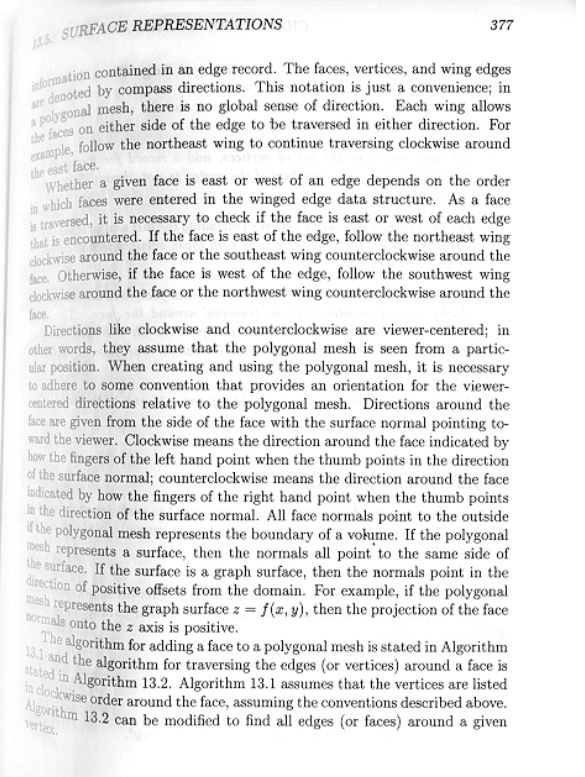

In [47]:
# Path to the input image
image = cv2.imread(image_arr[inp-1])

# cv2_imshow(image)

processed_img = remove_gutter(image)

# Display the processed image
cv2_imshow(processed_img)